## IMAGE ENHANCEMENT MODEL ON MEDICAL **IMAGES** 

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving image.png to image.png
User uploaded file "image.png" with length 190188 bytes


In [0]:
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np 


In [0]:
  
# Reading the input image 
img = cv2.imread('image.png', 0) 
ret,thresh_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print(thresh_img)
print(img.shape)
  


[[255 255 255 ... 255 255 255]
 [255 255 255 ...   0   0 255]
 [255 255 255 ...   0   0 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(618, 487)


Different formats can be selected to form a mask. Disk-shaped masks are independent of changes in rotation, they are chosen for medical images.

In [0]:

radius=5  #change the radius 
n=(2*radius)+1

arr = np.zeros( (n, n) )
arr[0][n//2]=1
arr[-1][n//2]=1
k=5
t=radius+1
for i in range(1,t):
    for j in range(n):
        shift=(n-k)//2
        if j >=shift and j<(n-shift):
            arr[i][j]=1
    if (k+2)!=n:
        k=k+2
arr[radius]=1
k=5
for i in range(n-2,t-1,-1):
    for j in range(n):
        shift=(n-k)//2
        if j >=shift and j<(n-shift):
            arr[i][j]=1
    if(k+2)!=n:
        k=k+2
            

kernel=arr.astype('uint8')
print(kernel)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


  
The first parameter is the original image,  kernel is the matrix with which image is  convolved and third parameter is the number  of iterations, which will determine how much  you want to erode/dilate a given image.  

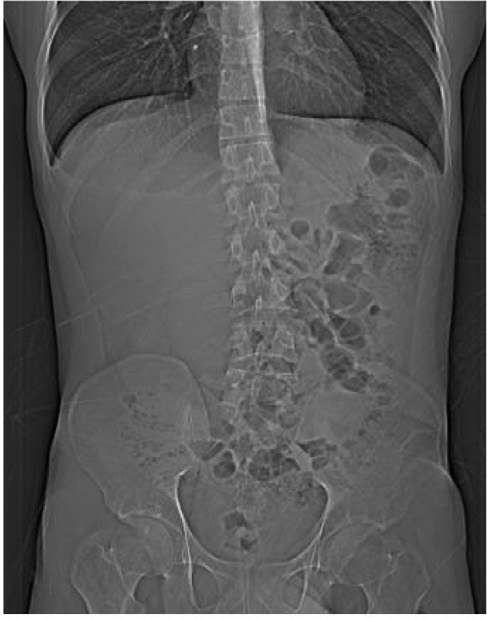

In [0]:
  
cv2_imshow( img) 


The opening operator is equivalent to the application of the erosion and dilation operations on the same image respectively while the closing operator acts in reverse:
opening=erosion->dilation

closing= dilation->erosion

The opening operator removes weak connections between
objects and small details while the closing operator removes
small holes and fills cracks.

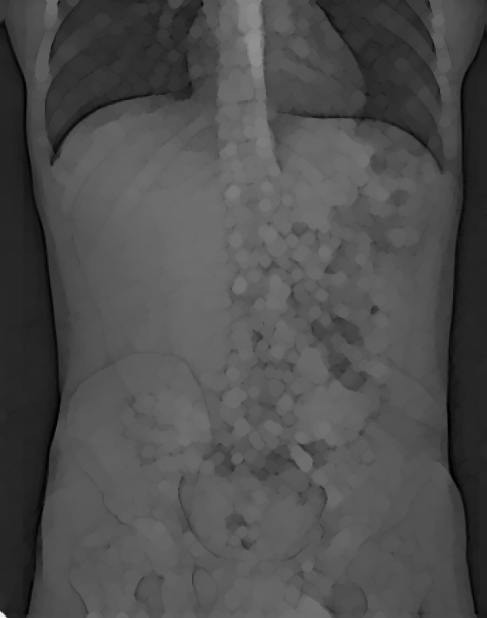

In [0]:
img_erosion = cv2.erode(img, kernel, iterations=1) 
opening= cv2.dilate(img_erosion, kernel, iterations=1) 
cv2_imshow(opening)


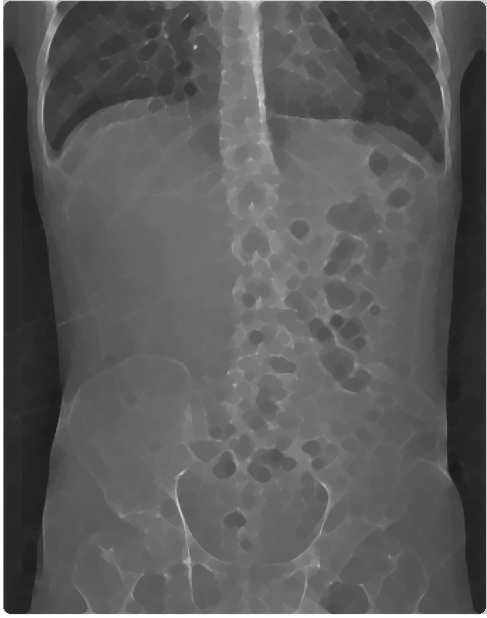

In [0]:

img_dilation=cv2.dilate(img,kernel,iterations=1)
closing=cv2.erode(img_dilation,kernel,iterations=1)
cv2_imshow(closing)

**top_hat=Open Top-Hat or White Top-Hat**
top hat transform acts like
a high-pass filter and extracts the bright areas of the image
(with contrast not less than h) which are smaller than the mask.

**bottom_hat=Close Top-Hat or Black Top-Hat **
bottom-Hat transform removes the background of the
image and leaves some dark areas of the image which are smaller than the mask itself.

Top-Hat transform is obtained by subtracting the opening of
the original image from the image itself and Bottom-Hat transform is obtained through subtracting the original image from its closing.

In [0]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT,kernel)
#cv2_imshow(tophat)
print(tophat)
top=img-opening
print(top)

[[199 196 199 ... 137 149 199]
 [197 196 188 ...   9  38 156]
 [195 197 193 ...   0   4 150]
 ...
 [ 17  14  20 ... 229 229 230]
 [ 19  19  19 ... 229 228 232]
 [ 19  19  19 ... 229 229 228]]
[[199 196 199 ... 137 149 199]
 [197 196 188 ...   9  38 156]
 [195 197 193 ...   0   4 150]
 ...
 [ 17  14  20 ... 229 229 230]
 [ 19  19  19 ... 229 228 232]
 [ 19  19  19 ... 229 229 228]]


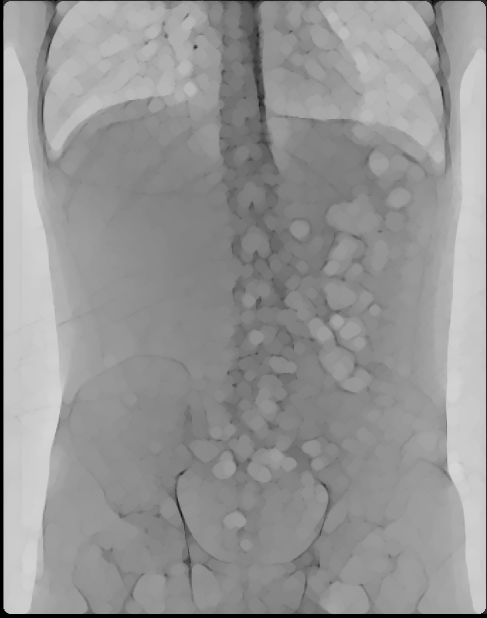

In [0]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT,kernel)
cv2_imshow(blackhat)

Add the bright areas (the results of the opening operator) to the image and subtract the dark areas (the
results of the closing operator) from it.

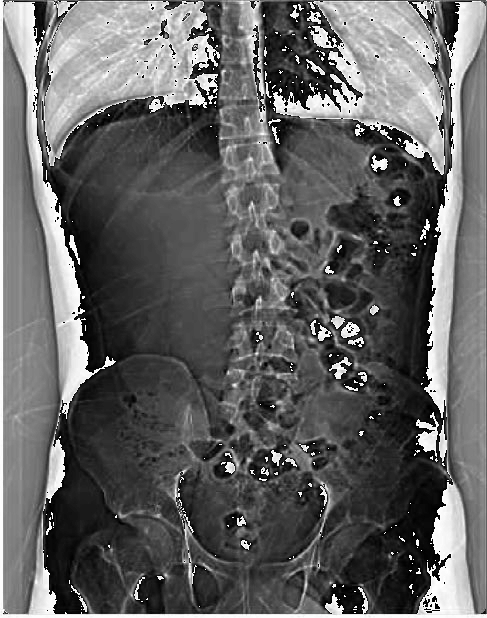

In [0]:
final=img+tophat-blackhat
cv2_imshow(final)

USE ANY TECHNIQUE TO CHECK THE QUALITY OF TRANSFORMED IMAGE.
